In [31]:
from prophet import Prophet
import pandas as pd

In [32]:
d=pd.read_excel(r"C:\Users\prernagupta\Desktop\taylorsuits-us.xlsx")


In [33]:
d

,TREND,BASE,START_DATE,FSI,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,MARKDOWN_INDEX,FASHION_LEADERS_INDEX,TRENDING_INDEX,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION
0,Suit Tailor Super Suit Tailor Us,Apparel,2016-01-04,0.001412,0.001634,-0.000277,0.000811,0.001990,-0.001676,0.000155,...,1.044508,0.202705,1.247559,NaN,"['2020-01-27', '2020-12-07']","['2016-01-11', '2020-09-14']",2021-09-20 14:00:59.999,camillereyes,Super Category,US
1,Suit Tailor Super Suit Tailor Us,Apparel,2016-01-11,0.001352,0.001608,-0.000371,0.000785,0.001918,-0.001681,0.000331,...,1.051929,0.218110,1.239123,NaN,"['2020-01-27', '2020-12-07']","['2016-01-11', '2020-09-14']",2021-09-20 14:00:59.999,camillereyes,Super Category,US
2,Suit Tailor Super Suit Tailor Us,Apparel,2016-01-18,0.001265,0.001593,-0.000380,0.000742,0.001884,-0.001310,0.000504,...,1.059009,0.233048,1.233847,NaN,"['2020-01-27', '2020-12-07']","['2016-01-11', '2020-09-14']",2021-09-20 14:00:59.999,camillereyes,Super Category,US
3,Suit Tailor Super Suit Tailor Us,Apparel,2016-01-25,0.001286,0.001589,-0.000392,0.000692,0.001872,-0.001361,0.000664,...,1.065748,0.247520,1.231731,NaN,"['2020-01-27', '2020-12-07']","['2016-01-11', '2020-09-14']",2021-09-20 14:00:59.999,camillereyes,Super Category,US
4,Suit Tailor Super Suit Tailor Us,Apparel,2016-02-01,0.001367,0.001595,-0.000463,0.000648,0.001875,-0.001026,0.000808,...,1.072146,0.261524,1.232776,NaN,"['2020-01-27', '2020-12-07']","['2016-01-11', '2020-09-14']",2021-09-20 14:00:59.999,camillereyes,Super Category,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,Suit Tailor Super Suit Tailor Us,Apparel,2022-08-15,NaN,NaN,0.009344,0.010592,0.011726,0.009607,0.011430,...,NaN,NaN,NaN,NaN,"['2020-01-27', '2020-12-07']","['2016-01-11', '2020-09-14']",2021-09-20 14:00:59.999,camillereyes,Super Category,US
346,Suit Tailor Super Suit Tailor Us,Apparel,2022-08-22,NaN,NaN,0.009513,0.010642,0.011751,0.009729,0.011630,...,NaN,NaN,NaN,NaN,"['2020-01-27', '2020-12-07']","['2016-01-11', '2020-09-14']",2021-09-20 14:00:59.999,camillereyes,Super Category,US
347,Suit Tailor Super Suit Tailor Us,Apparel,2022-08-29,NaN,NaN,0.009595,0.010706,0.011832,0.009916,0.011789,...,NaN,NaN,NaN,NaN,"['2020-01-27', '2020-12-07']","['2016-01-11', '2020-09-14']",2021-09-20 14:00:59.999,camillereyes,Super Category,US
348,Suit Tailor Super Suit Tailor Us,Apparel,2022-09-05,NaN,NaN,0.009724,0.010794,0.011899,0.010094,0.011901,...,NaN,NaN,NaN,NaN,"['2020-01-27', '2020-12-07']","['2016-01-11', '2020-09-14']",2021-09-20 14:00:59.999,camillereyes,Super Category,US


In [34]:
d=d.iloc[:, [2,3]]

In [35]:
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

<ipython-input-35-ec1e916fc466>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']= pd.to_datetime(df['ds'])


In [36]:
df

,ds,y
0,2016-01-04,0.001412
1,2016-01-11,0.001352
2,2016-01-18,0.001265
3,2016-01-25,0.001286
4,2016-02-01,0.001367
...,...,...
293,2021-08-16,0.007832
294,2021-08-23,0.008021
295,2021-08-30,0.007650
296,2021-09-06,0.007767


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


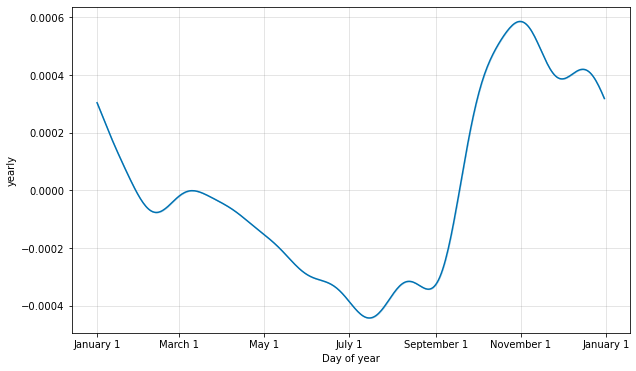

In [37]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


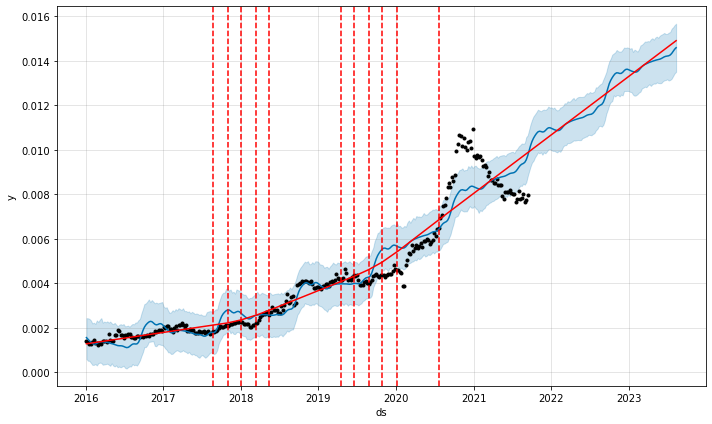

In [38]:
from prophet.plot import add_changepoints_to_plot
m = Prophet()
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


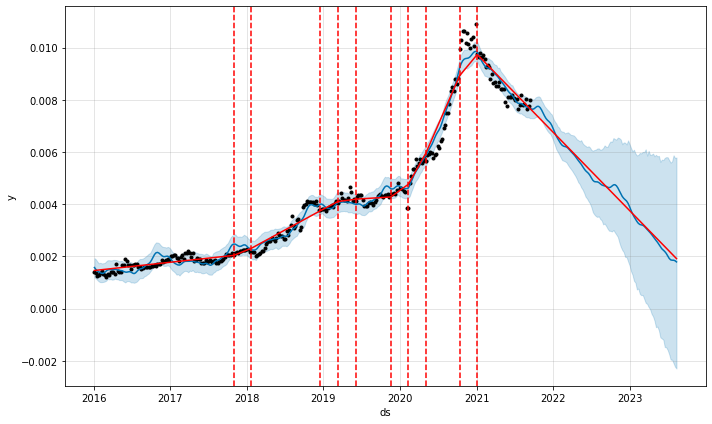

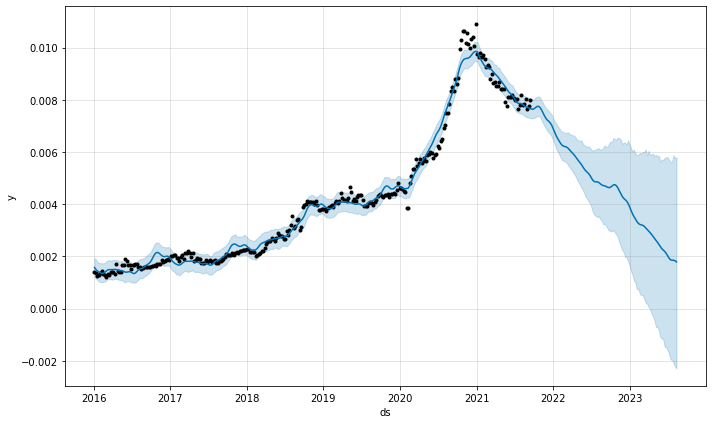

In [39]:
from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.05, growth='linear')
# define the model
# fit the model
m.fit(df)

future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)
fig = m.plot(fcst)

In [40]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')


INFO:prophet:Making 6 forecasts with cutoffs between 2018-03-28 00:00:00 and 2020-09-13 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

In [41]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,4.591737e-07,0.000678,0.000536,0.100967,0.108823,0.106642,0.129032
1,37 days,4.488155e-07,0.000670,0.000524,0.100522,0.108823,0.106046,0.129032
2,39 days,4.496667e-07,0.000671,0.000527,0.101199,0.108823,0.106684,0.129032
3,40 days,4.584854e-07,0.000677,0.000543,0.107242,0.109049,0.113417,0.096774
4,41 days,4.868072e-07,0.000698,0.000568,0.110231,0.109834,0.116796,0.096774


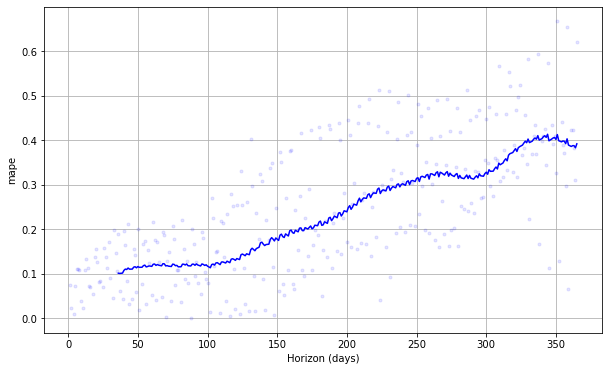

In [42]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


<ipython-input-46-054b9756ee78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cap'] = 0.012
<ipython-input-46-054b9756ee78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor'] = 0
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


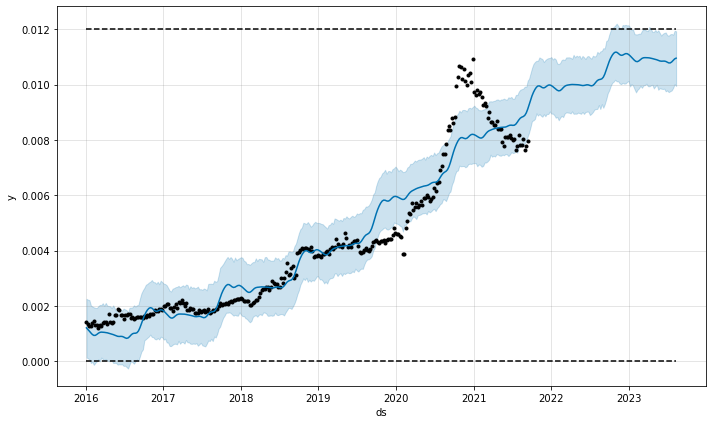

In [46]:
#logitsic, caps floors 
df['cap'] = 0.012
df['floor'] = 0
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.05, growth='logistic')

m.fit(df)
q=m.predict(df)
future = m.make_future_dataframe(periods=100, freq='W')
future['cap'] = 0.012
future['floor'] = 0
fcst = m.predict(future)
fig = m.plot(fcst)

In [45]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


INFO:prophet:Making 6 forecasts with cutoffs between 2018-03-28 00:00:00 and 2020-09-13 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,1.104699e-07,0.000332,0.000245,0.053788,0.031014,0.056426,0.483871
1,37 days,1.107991e-07,0.000333,0.000247,0.054495,0.031014,0.057142,0.483871
2,39 days,1.073037e-07,0.000328,0.000238,0.052406,0.030977,0.054961,0.516129
3,40 days,1.136946e-07,0.000337,0.000249,0.057095,0.031014,0.060162,0.483871
4,41 days,1.143353e-07,0.000338,0.000250,0.055843,0.031014,0.058828,0.483871
